# **Stock Market Analysis**

**Scope** :- This Analysis focus on the performane of major tech companies like Apple, Microsoft, Netflix, and Google over the past 3 months, using historical stock price data.

**Objective** :- The goal is to identify trends and patterns in stock price movements, calculate moving averages and volatility for each company, and conduct correlation analysis to examine the relationships between different stock prices.


## **Step 1 : Collect Companies Data**

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
# Read File
stocks_df = pd.read_csv('/content/drive/MyDrive/UnifiedMentor_Projects/Market_Analysis/stocks.csv')
stocks_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


## **Step 2 : Data Preparation**

This step checks for missing values ​​and handles them by filling or removing them and then converting the Date column to **datetime** format.

In [3]:
# Checking columns and data types
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [4]:
#Describing the dataset
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [5]:
stocks_df.dtypes

,0
Ticker,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [6]:
#Checking the dataset shape
stocks_df.shape

(248, 8)

In [7]:
# Check for missing values
stocks_df.isnull().any()

,0
Ticker,False
Date,False
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


In [8]:
stocks_df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
stocks_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
243,False
244,False
245,False
246,False


In [10]:
stocks_df.duplicated().sum()

0

Here we can see that there is no missing value exist

In [11]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [12]:
# Checking columns and data types
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [13]:
stocks_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [14]:
# Sort the data by Date and Ticker
stock_data = stocks_df.sort_values(by=['Ticker', 'Date'])

# # Calculate moving averages (7-day) for each stock
# stock_data['7_day_MA'] = stock_data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=7).mean())


## **Step 3 : EDA**

### **Stock Market Performance of 3 Months in 2023**

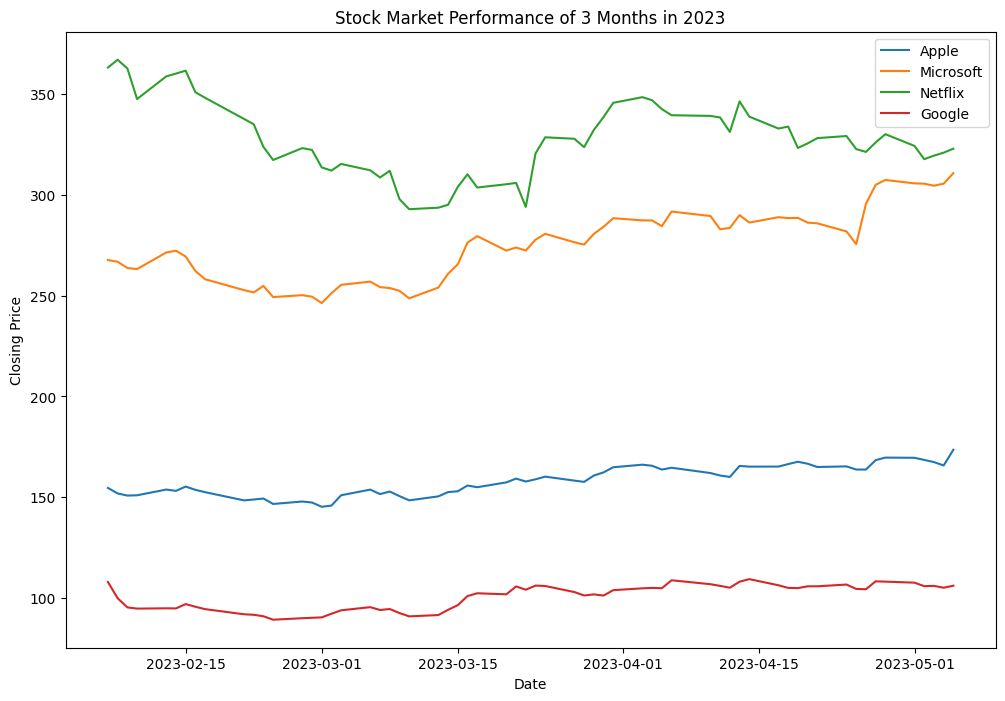

In [15]:
# Select the data for each company
apple_data = stock_data[stock_data['Ticker'] == 'AAPL']
microsoft_data = stock_data[stock_data['Ticker'] == 'MSFT']
netflix_data = stock_data[stock_data['Ticker'] == 'NFLX']
google_data = stock_data[stock_data['Ticker'] == 'GOOG']

# Create line plots for each company
plt.figure(figsize=(12, 8))
plt.plot(apple_data['Date'], apple_data['Close'], label='Apple')
plt.plot(microsoft_data['Date'], microsoft_data['Close'], label='Microsoft')
plt.plot(netflix_data['Date'], netflix_data['Close'], label='Netflix')
plt.plot(google_data['Date'], google_data['Close'], label='Google')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Market Performance of 3 Months in 2023')
plt.legend()
plt.show()

# Calculate descriptive statistics for each stock
stocks = [apple_data, microsoft_data, netflix_data, google_data]
tickers = ['Apple', 'Microsoft', 'Netflix', 'Google']
for i, stock in enumerate(stocks):
    ticker = tickers[i]
    print(f"Descriptive statistics for {ticker}:")
    print(stock['Close'].describe())
    print()


**Apple** : Apple's stock has shown steady and stable growth over the past three months, with no major fluctuations. It has been performing well consistently, making it a reliable choice for long-term investors.

**Microsoft** : Microsoft follows a similar pattern to Apple, showing steady growth without much volatility. It is a good stock for those looking for low-risk, stable returns.

**Netflix** : Netflix's stock is much more volatile, with sharp price fluctuations. While this makes it riskier, it can also offer more potential profits for short-term traders.

**Google** : Google has shown steady growth like Apple and Microsoft, with less large price fluctuations, indicating that it is a stable choice.

Key Information: For safe, long-term investments, Apple, Microsoft and Google are good choices. Netflix may be suitable for investors looking for higher risk and potential short-term gains.

### **Calculate moving averages**

Descriptive statistics for Apple:
count     62.000000
mean     158.240645
std        7.360485
min      145.309998
25%      152.077499
50%      158.055000
75%      165.162506
max      173.570007
Name: Close, dtype: float64

Descriptive statistics for Microsoft:
count     62.000000
mean     275.039839
std       17.676231
min      246.270004
25%      258.742500
50%      275.810013
75%      287.217506
max      310.649994
Name: Close, dtype: float64

Descriptive statistics for Netflix:
count     62.000000
mean     327.614677
std       18.554419
min      292.760010
25%      315.672493
50%      325.600006
75%      338.899994
max      366.829987
Name: Close, dtype: float64

Descriptive statistics for Google:
count     62.000000
mean     100.631532
std        6.279464
min       89.349998
25%       94.702501
50%      102.759998
75%      105.962503
max      109.459999
Name: Close, dtype: float64



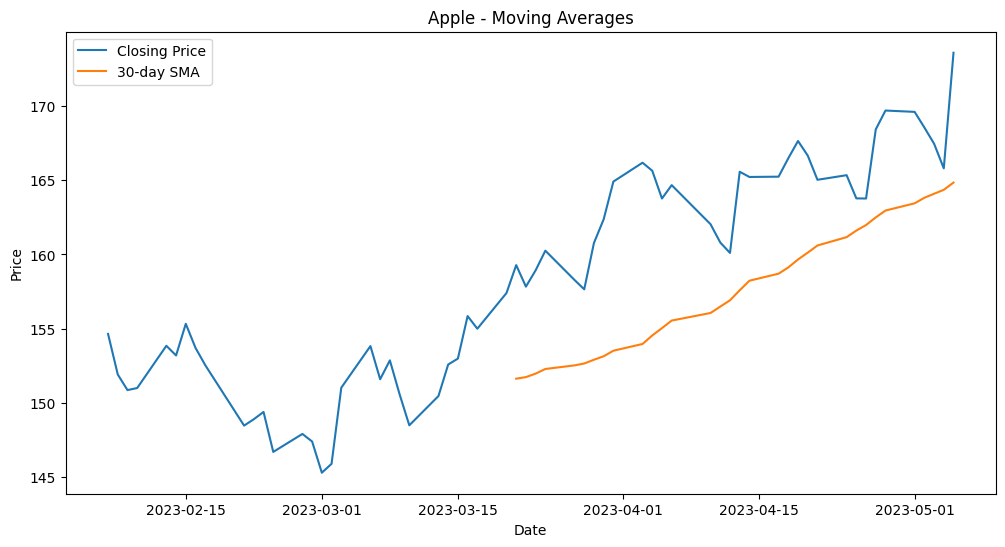

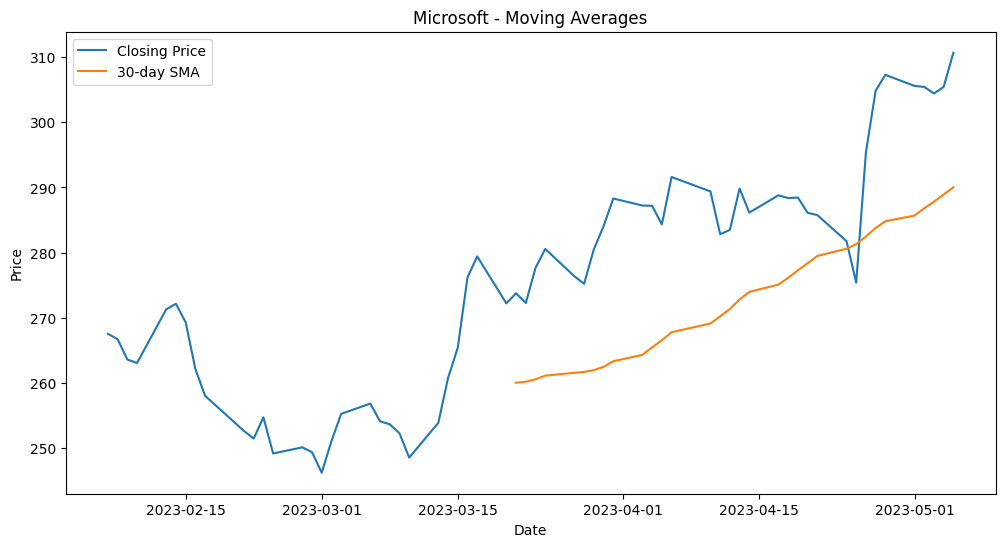

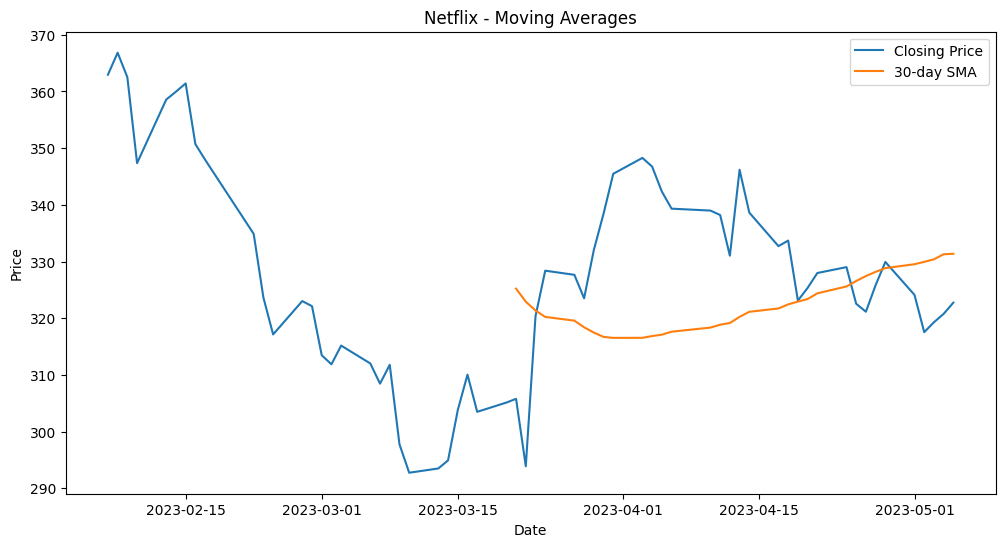

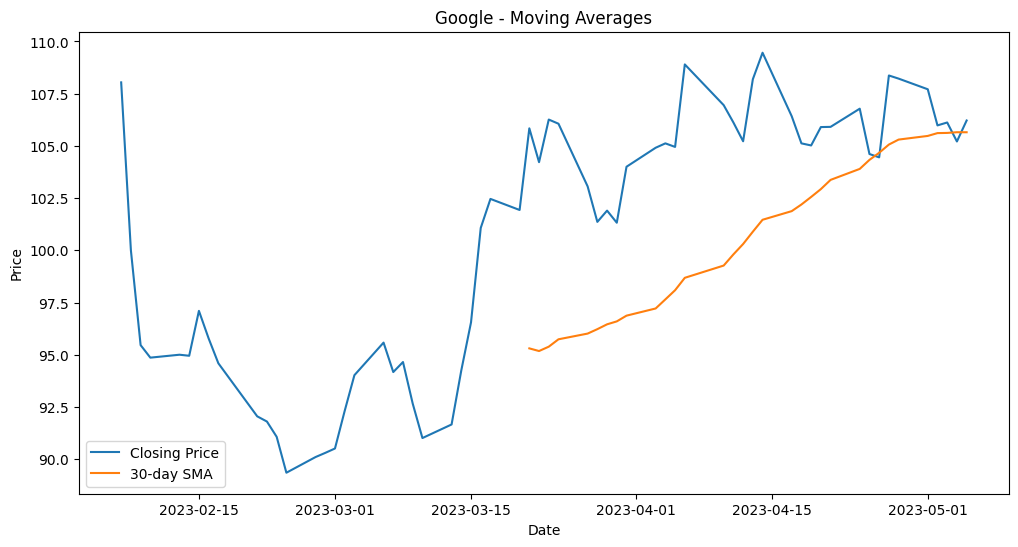

In [16]:
# Select the data for each company
apple_data = stock_data[stock_data['Ticker'] == 'AAPL']
microsoft_data = stock_data[stock_data['Ticker'] == 'MSFT']
netflix_data = stock_data[stock_data['Ticker'] == 'NFLX']
google_data = stock_data[stock_data['Ticker'] == 'GOOG']

# Calculate moving averages
window_sizes = [30]
tickers = ['Apple', 'Microsoft', 'Netflix', 'Google']
for i, stock in enumerate([apple_data, microsoft_data, netflix_data, google_data]):
    ticker = tickers[i]
    close_prices = stock['Close']
    plt.figure(figsize=(12, 6))
    plt.plot(stock['Date'], close_prices, label='Closing Price')

    for window in window_sizes:
        # Calculate the moving average using the rolling() function
        moving_avg = close_prices.rolling(window).mean()
        plt.plot(stock['Date'], moving_avg, label=f'{window}-day SMA')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} - Moving Averages')
    plt.legend()
    plt.show()

### **Calculate the volatility for each stock**

Volatility for Apple: 7.360485288670256
Volatility for Microsoft: 17.676231391058884
Volatility for Netflix: 18.554418705338584
Volatility for Google: 6.2794639728257104


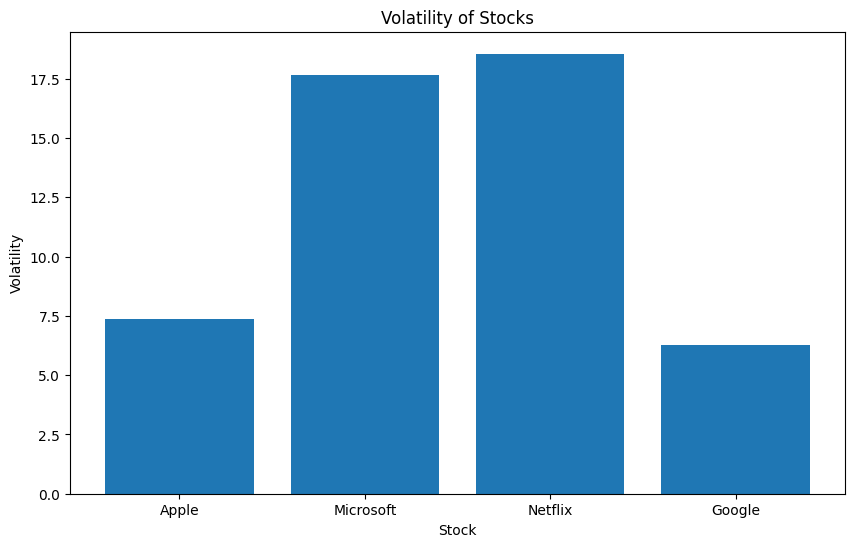

In [17]:
# prompt: # Calculate the volatility for each stock in bar chart

# Calculate volatility (standard deviation of daily returns) for each stock
for i, stock in enumerate([apple_data, microsoft_data, netflix_data, google_data]):
    ticker = tickers[i]
    volatility = stock['Close'].std()
    print(f"Volatility for {ticker}: {volatility}")

# Plot the volatility for each stock in a bar chart
volatilities = []
for stock in [apple_data, microsoft_data, netflix_data, google_data]:
    volatilities.append(stock['Close'].std())

plt.figure(figsize=(10, 6))
plt.bar(tickers, volatilities)
plt.xlabel('Stock')
plt.ylabel('Volatility')
plt.title('Volatility of Stocks')
plt.show()


**Netflix** has the highest volatility, meaning its price fluctuates the most. This makes it a riskier stock to hold but also offers opportunities for higher short-term gains.

**Apple** and **Microsoft** have lower volatility, meaning their prices are more stable, which is ideal for conservative investors.
Google is moderately volatile, sitting between the stability of Apple/Microsoft and the riskiness of Netflix.

**Key Insight**: If you prefer stable stocks with predictable movements, Apple and Microsoft are your best bets. For a risk-tolerant investor, Netflix offers opportunities but requires careful attention due to its volatility.

In [18]:
stock_pivot = stock_data.pivot_table(index='Date', columns='Ticker', values='Close')
stock_pivot.head()


Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007


### **Correlation matrix**


Correlation Matrix:
 Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000


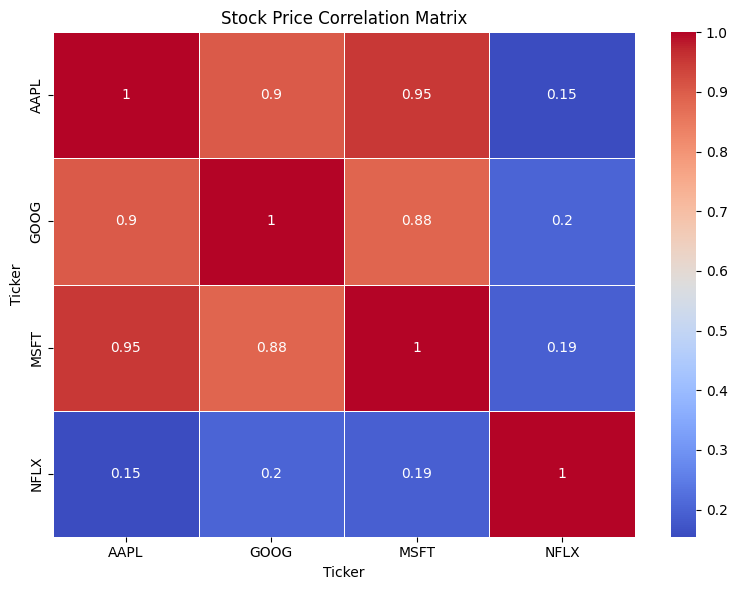

In [19]:
# Compute the correlation matrix
correlation_matrix = stock_pivot.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Price Correlation Matrix')
plt.tight_layout()
plt.show()



Apple and Microsoft are closely correlated, meaning their stock prices often move together. This is common because both are tech giants and often react similarly to market trends. Netflix does not have a close relationship with Apple or Microsoft, meaning its price movements are different from these traditional tech companies. It can help diversify a portfolio that already includes Apple or Microsoft. Google shows some moderate correlation with Apple and Microsoft, but not as strong as they have with each other.

In [20]:
# Convert the correlation matrix into a long format
# Renaming the index columns to avoid conflict with existing column names
correlation_long_format = correlation_matrix.stack().reset_index(drop=True)

# Check for column name conflicts and rename them appropriately
correlation_long_format.columns = ['Stock1', 'Stock2', 'Correlation']

# Save the long-format correlation data as a CSV file for Tableau
correlation_long_format.to_csv('/content/correlation_matrix_for_tableau.csv', index=False)



In [21]:
# prompt: download csv file

from google.colab import files

# Assuming 'stock_data' is your DataFrame
stock_data.to_csv('processed_stock_data.csv', encoding = 'utf-8-sig')



## **Conclusion**

For stability and long-term growth, Apple, Microsoft, and Google are solid choices. If you're looking for higher potential returns in the short term, Netflix might be a good option, but be prepared for higher risk. A balanced portfolio should consider a mix of these stocks to optimize both growth and risk management.